# Pregunta 3:
## ¿Qué dimensión del capital familiar: cultural (educación de los padres) o económico (estrato y bienes del hogar) tiene mayor poder explicativo sobre el desempeño en el Saber 11?

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Leer datos
df = pd.read_csv("df_limpio.csv")

# Ver primeras filas
df.head()


,PERIODO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_PAIS_RESIDE,FAMI_CUARTOSHOGAR,...,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL,FAMI_EDU_PADRES_SUM,EDU_MAX_HOGAR
0,20224,URBANO,N,MIXTO,UNICA,GRANADA,03/09/2004,F,COLOMBIA,Dos,...,No,A-,42.0,26.0,45.0,42.0,43.0,196.0,2,1
1,20224,URBANO,N,MIXTO,SABATINA,CHOACHI,10/02/2005,M,COLOMBIA,Tres,...,Si,A-,40.0,60.0,46.0,54.0,50.0,258.0,7,4
2,20224,URBANO,N,MIXTO,COMPLETA,SOACHA,25/06/2006,F,COLOMBIA,Tres,...,Si,A2,62.0,54.0,64.0,63.0,60.0,302.0,10,5
3,20224,RURAL,N,MIXTO,SABATINA,SASAIMA,18/05/2006,M,COLOMBIA,Dos,...,Si,A1,54.0,45.0,46.0,48.0,52.0,241.0,7,7
4,20224,URBANO,NaN,MIXTO,TARDE,SOACHA,26/08/2003,F,COLOMBIA,Tres,...,No,A-,44.0,44.0,36.0,31.0,48.0,200.0,8,6


In [21]:
df.shape


(285577, 27)

In [22]:
df.isnull().sum().sort_values(ascending=False)


COLE_BILINGUE               54215
FAMI_PERSONASHOGAR            610
FAMI_CUARTOSHOGAR             538
FAMI_TIENEAUTOMOVIL           367
ESTU_GENERO                   226
FAMI_TIENELAVADORA            165
PUNT_INGLES                    23
DESEMP_INGLES                  22
COLE_AREA_UBICACION             0
COLE_GENERO                     0
PERIODO                         0
FAMI_EDUCACIONMADRE             0
ESTU_PAIS_RESIDE                0
COLE_MCPIO_UBICACION            0
ESTU_FECHANACIMIENTO            0
COLE_JORNADA                    0
FAMI_EDUCACIONPADRE             0
FAMI_TIENEINTERNET              0
FAMI_ESTRATOVIVIENDA            0
FAMI_TIENECOMPUTADOR            0
PUNT_MATEMATICAS                0
PUNT_SOCIALES_CIUDADANAS        0
PUNT_C_NATURALES                0
PUNT_LECTURA_CRITICA            0
PUNT_GLOBAL                     0
FAMI_EDU_PADRES_SUM             0
EDU_MAX_HOGAR                   0
dtype: int64

Hay un gran porcentaje de datos faltantes, 171,841 Lo cual es gigante, pues se podría decir el propósito del dataset es puntaje del icfes, sin emabrgo, al ver que hay en total 470mil datos, tenemos datos válidos por al menos 298k.

In [23]:
# Quitar personas que no tienen puntajes por área
df = df.dropna(subset=[
    "PUNT_MATEMATICAS",
    "PUNT_LECTURA_CRITICA",
    "PUNT_INGLES"
])

# Revisar nuevamente
print(df.isna().sum())

# Ver tamaño actual
df.shape

PERIODO                         0
COLE_AREA_UBICACION             0
COLE_BILINGUE               54210
COLE_GENERO                     0
COLE_JORNADA                    0
COLE_MCPIO_UBICACION            0
ESTU_FECHANACIMIENTO            0
ESTU_GENERO                   226
ESTU_PAIS_RESIDE                0
FAMI_CUARTOSHOGAR             538
FAMI_EDUCACIONMADRE             0
FAMI_EDUCACIONPADRE             0
FAMI_ESTRATOVIVIENDA            0
FAMI_PERSONASHOGAR            610
FAMI_TIENEAUTOMOVIL           367
FAMI_TIENECOMPUTADOR            0
FAMI_TIENEINTERNET              0
FAMI_TIENELAVADORA            165
DESEMP_INGLES                   0
PUNT_INGLES                     0
PUNT_MATEMATICAS                0
PUNT_SOCIALES_CIUDADANAS        0
PUNT_C_NATURALES                0
PUNT_LECTURA_CRITICA            0
PUNT_GLOBAL                     0
FAMI_EDU_PADRES_SUM             0
EDU_MAX_HOGAR                   0
dtype: int64


(285554, 27)

In [24]:
df = df.dropna(subset=[
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENELAVADORA"
])

print(df.isna().sum())
df.shape

PERIODO                         0
COLE_AREA_UBICACION             0
COLE_BILINGUE               54132
COLE_GENERO                     0
COLE_JORNADA                    0
COLE_MCPIO_UBICACION            0
ESTU_FECHANACIMIENTO            0
ESTU_GENERO                   226
ESTU_PAIS_RESIDE                0
FAMI_CUARTOSHOGAR             520
FAMI_EDUCACIONMADRE             0
FAMI_EDUCACIONPADRE             0
FAMI_ESTRATOVIVIENDA            0
FAMI_PERSONASHOGAR            597
FAMI_TIENEAUTOMOVIL             0
FAMI_TIENECOMPUTADOR            0
FAMI_TIENEINTERNET              0
FAMI_TIENELAVADORA              0
DESEMP_INGLES                   0
PUNT_INGLES                     0
PUNT_MATEMATICAS                0
PUNT_SOCIALES_CIUDADANAS        0
PUNT_C_NATURALES                0
PUNT_LECTURA_CRITICA            0
PUNT_GLOBAL                     0
FAMI_EDU_PADRES_SUM             0
EDU_MAX_HOGAR                   0
dtype: int64


(285091, 27)

Limpiamoz el data set, para que todos los posibles datos que necesutemos esten completos. contamos con un total de 287mil datos

No sé como tratar la dimensión la dimensión cultural, si po rsperado, crear un indice conjunto, o tomar solo el de la madre, al ser probablemente más relevante

In [25]:
df["FAMI_EDUCACIONMADRE"].value_counts().sort_index()

FAMI_EDUCACIONMADRE
0      5244
1      3565
2     37359
3     38722
4     42828
5     77481
6      8238
7     25134
8      6973
9     31473
10     8074
Name: count, dtype: int64

In [26]:
df["FAMI_EDUCACIONMADRE"].value_counts().sort_index()

FAMI_EDUCACIONMADRE
0      5244
1      3565
2     37359
3     38722
4     42828
5     77481
6      8238
7     25134
8      6973
9     31473
10     8074
Name: count, dtype: int64

In [27]:
#Distribucipon conjunta me permite ver en una matriz como encajan los datos en relación con los otros
pd.crosstab(
    df["FAMI_EDUCACIONMADRE"], 
    df["FAMI_EDUCACIONPADRE"]
)

FAMI_EDUCACIONPADRE,0,1,2,3,4,5,6,7,8,9,10
FAMI_EDUCACIONMADRE,,,,,,,,,,,
0,3097,49,324,223,330,515,62,190,82,312,60
1,132,1794,816,339,182,206,21,31,5,33,6
2,1597,1955,21371,5632,3368,2669,196,261,70,215,25
3,1577,1271,9069,17170,4252,4345,193,446,108,266,25
4,2230,1103,8192,6568,13937,7910,558,1148,332,786,64
5,4235,1331,8049,8821,11243,33463,1585,4024,968,3432,330
6,482,115,490,511,1142,2315,1315,945,243,590,90
7,1779,261,1197,1280,2682,6659,941,5965,854,3093,423
8,525,68,206,239,572,1396,277,678,1184,1548,280


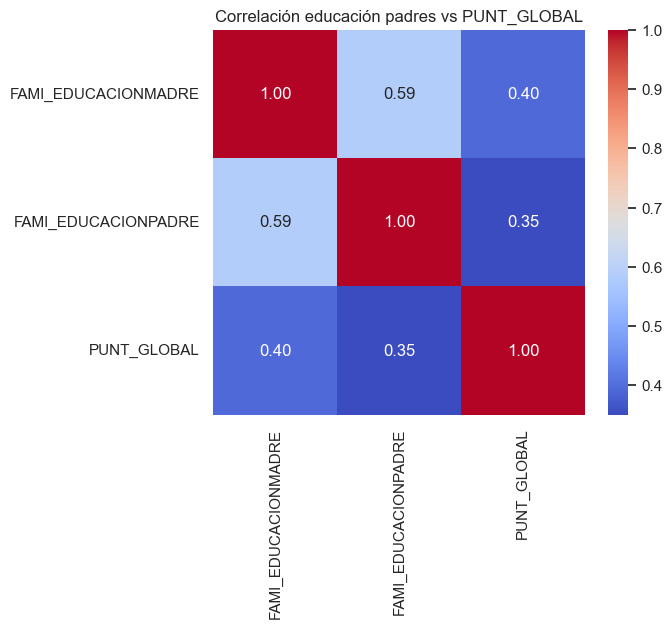

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[[
    "FAMI_EDUCACIONMADRE",
    "FAMI_EDUCACIONPADRE",
    "PUNT_GLOBAL"
]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlación educación padres vs PUNT_GLOBAL")
plt.show()

Dado que la educación materna y paterna presentan una correlación moderada (ρ = 0.59), pero no lo suficientemente alta como para considerarlas redundantes, se construyó un indicador agregado de capital cultural del hogar utilizando el máximo nivel educativo alcanzado por alguno de los padres.

In [29]:
df["EDU_MAX_HOGAR"].describe()

count    285091.000000
mean          5.321792
std           2.374543
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          10.000000
Name: EDU_MAX_HOGAR, dtype: float64

In [30]:
df

,PERIODO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_PAIS_RESIDE,FAMI_CUARTOSHOGAR,...,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL,FAMI_EDU_PADRES_SUM,EDU_MAX_HOGAR
0,20224,URBANO,N,MIXTO,UNICA,GRANADA,03/09/2004,F,COLOMBIA,Dos,...,No,A-,42.0,26.0,45.0,42.0,43.0,196.0,2,1
1,20224,URBANO,N,MIXTO,SABATINA,CHOACHI,10/02/2005,M,COLOMBIA,Tres,...,Si,A-,40.0,60.0,46.0,54.0,50.0,258.0,7,4
2,20224,URBANO,N,MIXTO,COMPLETA,SOACHA,25/06/2006,F,COLOMBIA,Tres,...,Si,A2,62.0,54.0,64.0,63.0,60.0,302.0,10,5
3,20224,RURAL,N,MIXTO,SABATINA,SASAIMA,18/05/2006,M,COLOMBIA,Dos,...,Si,A1,54.0,45.0,46.0,48.0,52.0,241.0,7,7
4,20224,URBANO,NaN,MIXTO,TARDE,SOACHA,26/08/2003,F,COLOMBIA,Tres,...,No,A-,44.0,44.0,36.0,31.0,48.0,200.0,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285572,20152,URBANO,N,MIXTO,MAÑANA,GUAYABETAL,19/12/1998,F,COLOMBIA,Cuatro,...,Si,A-,41.0,42.0,41.0,45.0,47.0,218.0,4,2
285573,20162,URBANO,N,MIXTO,COMPLETA,NEMOCON,22/06/2000,M,COLOMBIA,Dos,...,No,A2,59.0,77.0,66.0,61.0,58.0,325.0,4,2
285574,20172,URBANO,N,MIXTO,MAÑANA,PARATEBUENO,29/11/2000,F,COLOMBIA,Cinco,...,Si,A-,43.0,36.0,33.0,42.0,40.0,191.0,13,9
285575,20194,URBANO,N,MIXTO,MAÑANA,FOMEQUE,21/06/2002,M,COLOMBIA,Seis o mas,...,Si,A-,34.0,50.0,37.0,35.0,57.0,220.0,6,4


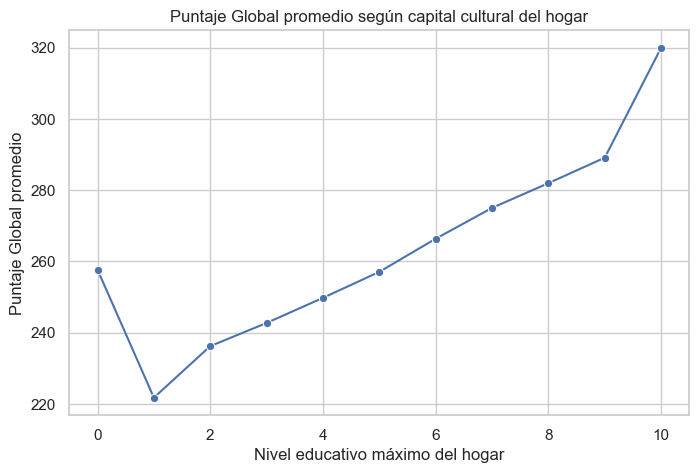

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular promedio por nivel educativo
promedios = df.groupby("EDU_MAX_HOGAR")["PUNT_GLOBAL"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(
    data=promedios,
    x="EDU_MAX_HOGAR",
    y="PUNT_GLOBAL",
    marker="o"
)

plt.title("Puntaje Global promedio según capital cultural del hogar")
plt.xlabel("Nivel educativo máximo del hogar")
plt.ylabel("Puntaje Global promedio")
plt.show()

In [32]:
df["EDU_MAX_HOGAR"].value_counts().sort_index()

EDU_MAX_HOGAR
0      3097
1      1975
2     26063
3     35281
4     40162
5     82787
6      8985
7     27809
8      7807
9     39611
10    11514
Name: count, dtype: int64

In [33]:
resumen = df.groupby("EDU_MAX_HOGAR")["PUNT_GLOBAL"].agg(
    N="count",
    PROMEDIO="mean",
    MEDIANA="median",
    STD="std"
).reset_index()

resumen

,EDU_MAX_HOGAR,N,PROMEDIO,MEDIANA,STD
0,0,3097,257.690023,255.0,49.714893
1,1,1975,221.781772,218.0,38.536322
2,2,26063,236.240149,234.0,38.955639
3,3,35281,242.747088,241.0,39.154322
4,4,40162,249.789079,248.0,40.089832
5,5,82787,257.081994,257.0,41.640541
6,6,8985,266.380412,267.0,41.350507
7,7,27809,275.028947,276.0,41.694419
8,8,7807,281.975535,283.0,44.223636
9,9,39611,289.118805,291.0,47.147812


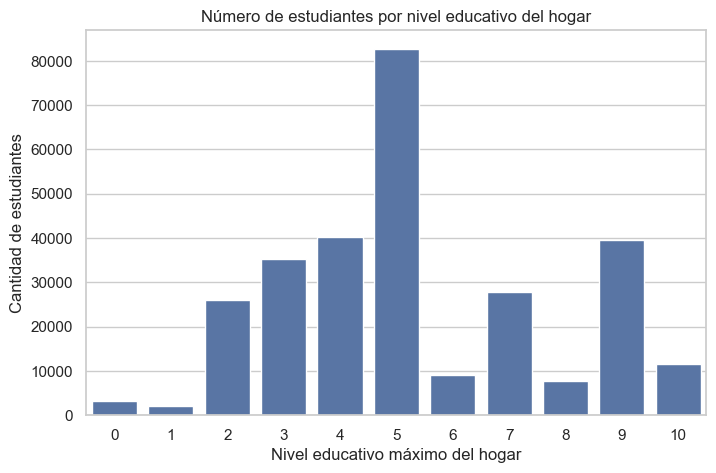

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

conteo = df["EDU_MAX_HOGAR"].value_counts().sort_index().reset_index()
conteo.columns = ["EDU_MAX_HOGAR", "N"]

plt.figure(figsize=(8,5))
sns.barplot(data=conteo, x="EDU_MAX_HOGAR", y="N")
plt.title("Número de estudiantes por nivel educativo del hogar")
plt.xlabel("Nivel educativo máximo del hogar")
plt.ylabel("Cantidad de estudiantes")
plt.show()

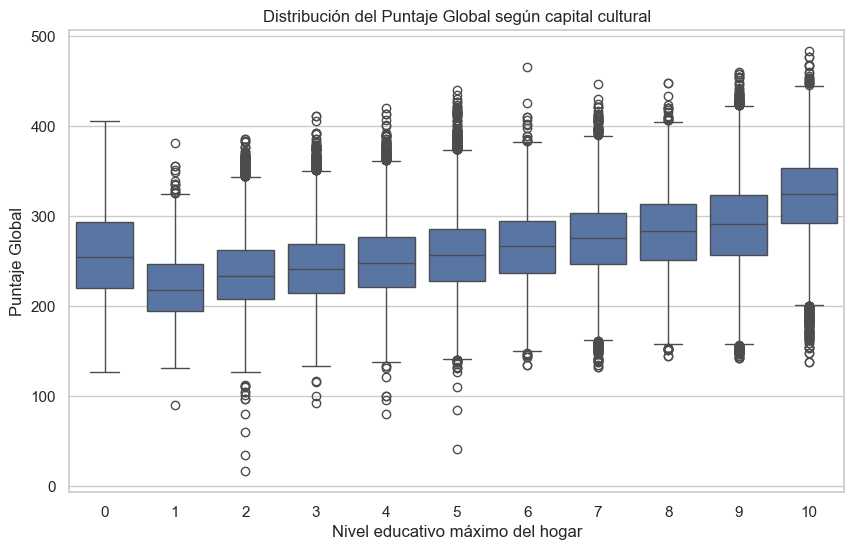

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x="EDU_MAX_HOGAR",
    y="PUNT_GLOBAL",
    data=df
)

plt.title("Distribución del Puntaje Global según capital cultural")
plt.xlabel("Nivel educativo máximo del hogar")
plt.ylabel("Puntaje Global")
plt.show()

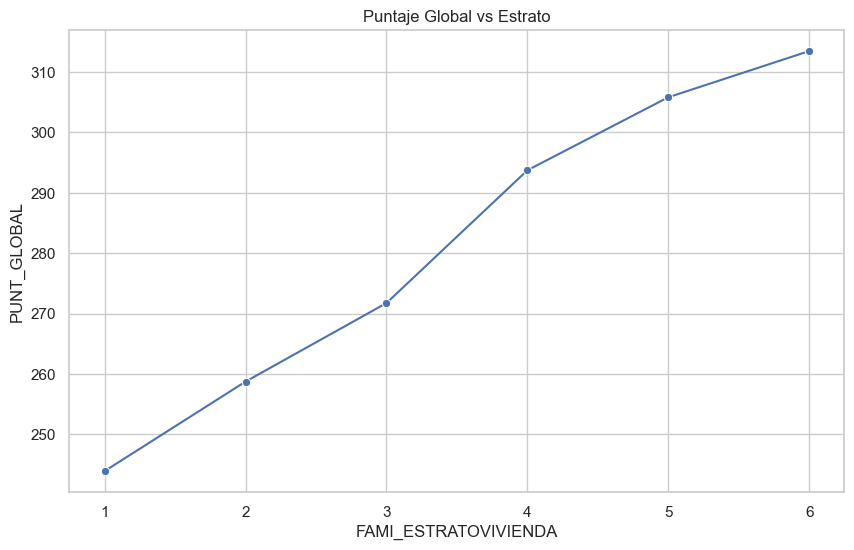

In [36]:
prom_estrato = df.groupby("FAMI_ESTRATOVIVIENDA")["PUNT_GLOBAL"].mean().reset_index()

sns.lineplot(data=prom_estrato,
             x="FAMI_ESTRATOVIVIENDA",
             y="PUNT_GLOBAL",
             marker="o")

plt.title("Puntaje Global vs Estrato")
plt.show()

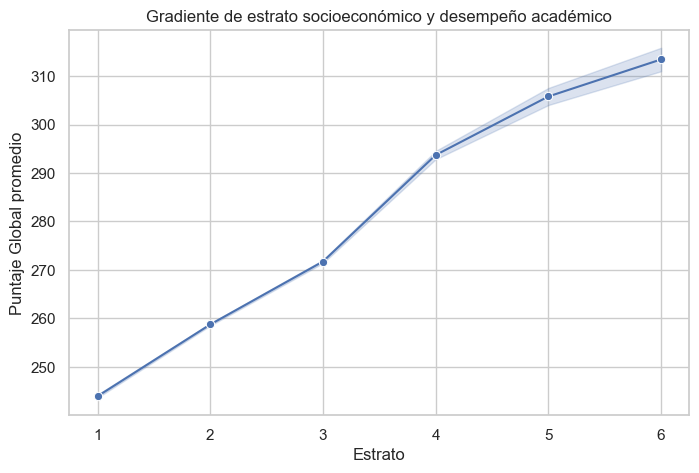

In [41]:
plt.figure(figsize=(8,5))

sns.lineplot(
    data=df,
    x="FAMI_ESTRATOVIVIENDA",
    y="PUNT_GLOBAL",
    estimator="mean",
    marker="o"
)

plt.title("Gradiente de estrato socioeconómico y desempeño académico")
plt.xlabel("Estrato")
plt.ylabel("Puntaje Global promedio")
plt.show()

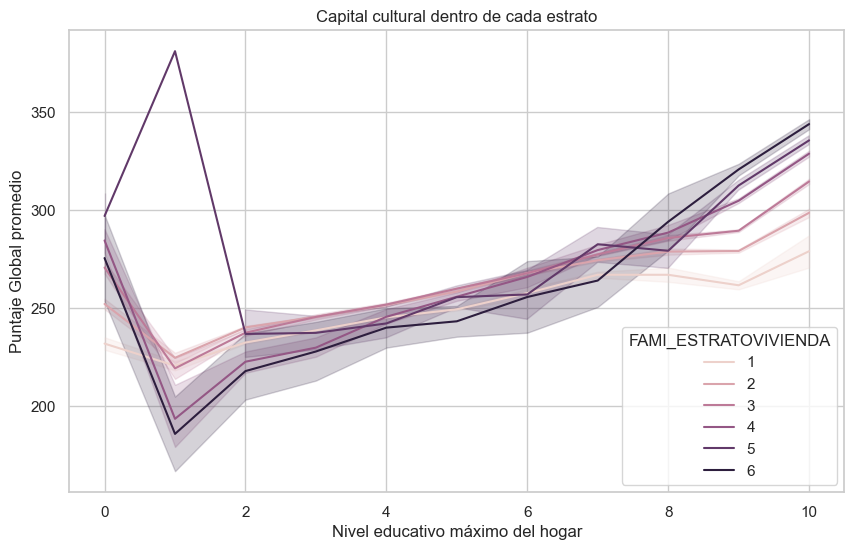

In [42]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=df,
    x="EDU_MAX_HOGAR",
    y="PUNT_GLOBAL",
    hue="FAMI_ESTRATOVIVIENDA",
    estimator="mean"
)

plt.title("Capital cultural dentro de cada estrato")
plt.xlabel("Nivel educativo máximo del hogar")
plt.ylabel("Puntaje Global promedio")
plt.show()

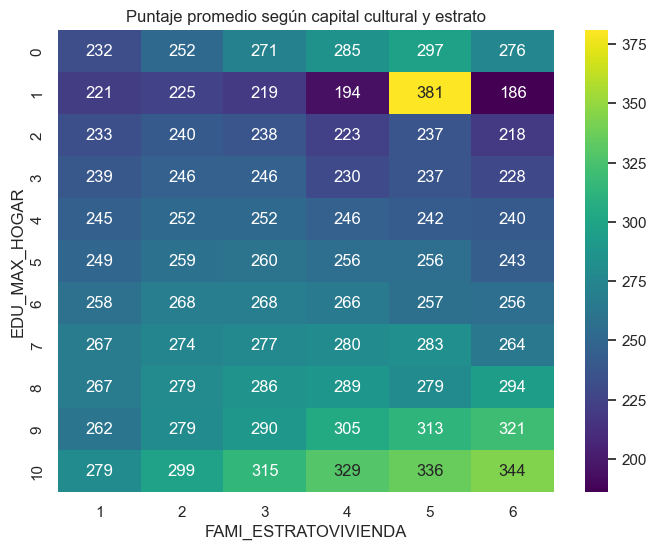

In [43]:
tabla = df.pivot_table(
    values="PUNT_GLOBAL",
    index="EDU_MAX_HOGAR",
    columns="FAMI_ESTRATOVIVIENDA",
    aggfunc="mean"
)

plt.figure(figsize=(8,6))
sns.heatmap(tabla, annot=True, fmt=".0f", cmap="viridis")

plt.title("Puntaje promedio según capital cultural y estrato")
plt.show()

In [44]:
tabla_n = df.pivot_table(
    values="PUNT_GLOBAL",
    index="EDU_MAX_HOGAR",
    columns="FAMI_ESTRATOVIVIENDA",
    aggfunc="count"
)

tabla_n

FAMI_ESTRATOVIVIENDA,1,2,3,4,5,6
EDU_MAX_HOGAR,,,,,,
0,574,1276,903,251,74,19
1,982,764,196,28,1,4
2,12080,11097,2601,226,46,13
3,13714,17451,3587,354,123,52
4,11383,20932,6982,618,160,87
5,15584,43730,21034,1897,347,195
6,1163,4270,3067,373,81,31
7,2878,13392,10143,1165,158,73
8,569,2970,3408,646,154,60


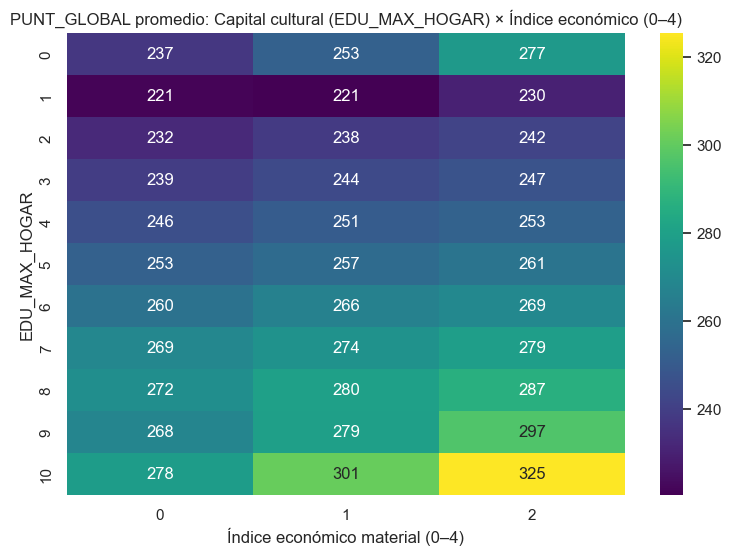

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

tabla_ie = df.pivot_table(
    values="PUNT_GLOBAL",
    index="EDU_MAX_HOGAR",
    columns="INDICE_ECON",
    aggfunc="mean"
)

plt.figure(figsize=(9,6))
sns.heatmap(tabla_ie, annot=True, fmt=".0f", cmap="viridis")
plt.title("PUNT_GLOBAL promedio: Capital cultural (EDU_MAX_HOGAR) × Índice económico (0–4)")
plt.xlabel("Índice económico material (0–4)")
plt.ylabel("EDU_MAX_HOGAR")
plt.show()

In [46]:
tabla_mean = df.pivot_table(
    values="PUNT_GLOBAL",
    index="EDU_MAX_HOGAR",
    columns="FAMI_ESTRATOVIVIENDA",
    aggfunc="mean"
)

tabla_n = df.pivot_table(
    values="PUNT_GLOBAL",
    index="EDU_MAX_HOGAR",
    columns="FAMI_ESTRATOVIVIENDA",
    aggfunc="count"
)

In [47]:
tabla_filtrada = tabla_mean.mask(tabla_n < 50)

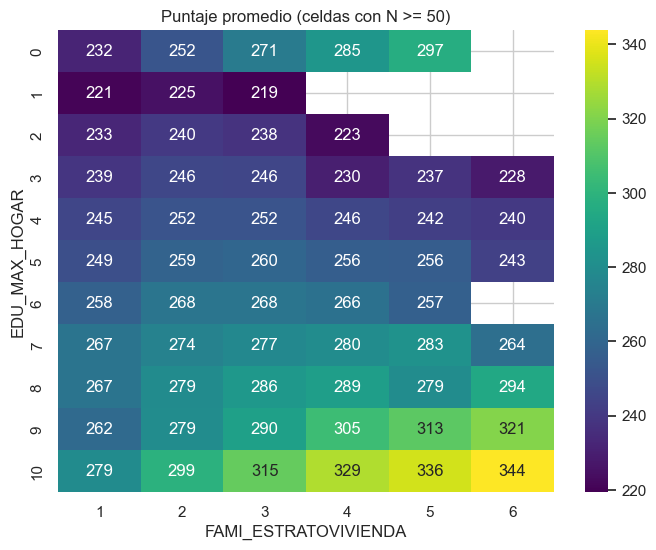

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(tabla_filtrada, annot=True, fmt=".0f", cmap="viridis")
plt.title("Puntaje promedio (celdas con N >= 50)")
plt.show()

In [49]:
tabla_mediana = df.pivot_table(
    values="PUNT_GLOBAL",
    index="EDU_MAX_HOGAR",
    columns="FAMI_ESTRATOVIVIENDA",
    aggfunc="median"
)

In [50]:
# Crear categoría agrupada de capital cultural

df["EDU_GRUPO"] = pd.cut(
    df["EDU_MAX_HOGAR"],
    bins=[-1, 2, 6, 10],
    labels=["Bajo (0-2)", "Medio (3-6)", "Alto (7-10)"]
)

df["EDU_GRUPO"].value_counts()

EDU_GRUPO
Medio (3-6)    167215
Alto (7-10)     86741
Bajo (0-2)      31135
Name: count, dtype: int64

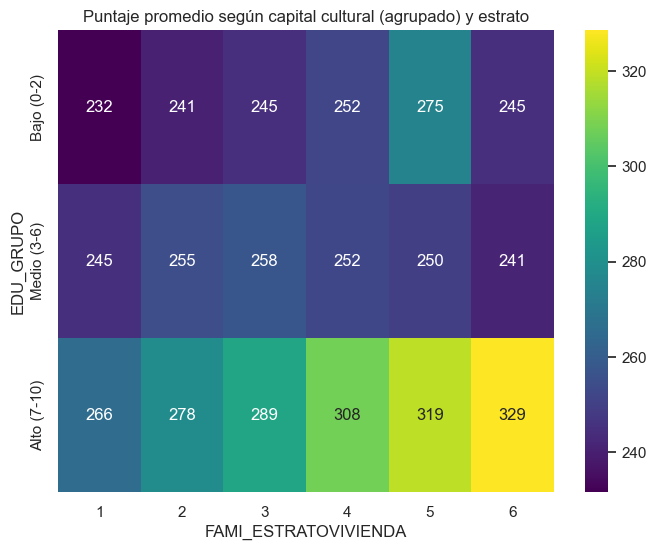

In [51]:
tabla_group = df.pivot_table(
    values="PUNT_GLOBAL",
    index="EDU_GRUPO",
    columns="FAMI_ESTRATOVIVIENDA",
    aggfunc="mean"
)

plt.figure(figsize=(8,6))
sns.heatmap(tabla_group, annot=True, fmt=".0f", cmap="viridis")
plt.title("Puntaje promedio según capital cultural (agrupado) y estrato")
plt.show()

In [52]:
df.columns

Index(['PERIODO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_GENERO',
       'COLE_JORNADA', 'COLE_MCPIO_UBICACION', 'ESTU_FECHANACIMIENTO',
       'ESTU_GENERO', 'ESTU_PAIS_RESIDE', 'FAMI_CUARTOSHOGAR',
       'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_PERSONASHOGAR', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'DESEMP_INGLES',
       'PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS',
       'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL',
       'FAMI_EDU_PADRES_SUM', 'EDU_MAX_HOGAR', 'INDICE_ECON', 'EDU_GRUPO'],
      dtype='str')

In [53]:
# ¿Hay NaN en las llaves del gráfico?
print(df[["FAMI_ESTRATOVIVIENDA","EDU_MAX_HOGAR","INDICE_ECON","PUNT_GLOBAL"]].isna().sum())

# ¿Qué valores únicos tienen?
print("Estratos:", sorted(df["FAMI_ESTRATOVIVIENDA"].unique())[:20])
print("EDU_MAX_HOGAR únicos (muestra):", sorted(df["EDU_MAX_HOGAR"].unique())[:20])
print("INDICE_ECON:", sorted(df["INDICE_ECON"].unique())[:20])

FAMI_ESTRATOVIVIENDA    0
EDU_MAX_HOGAR           0
INDICE_ECON             0
PUNT_GLOBAL             0
dtype: int64
Estratos: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
EDU_MAX_HOGAR únicos (muestra): [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
INDICE_ECON: [np.int64(0), np.int64(1), np.int64(2)]


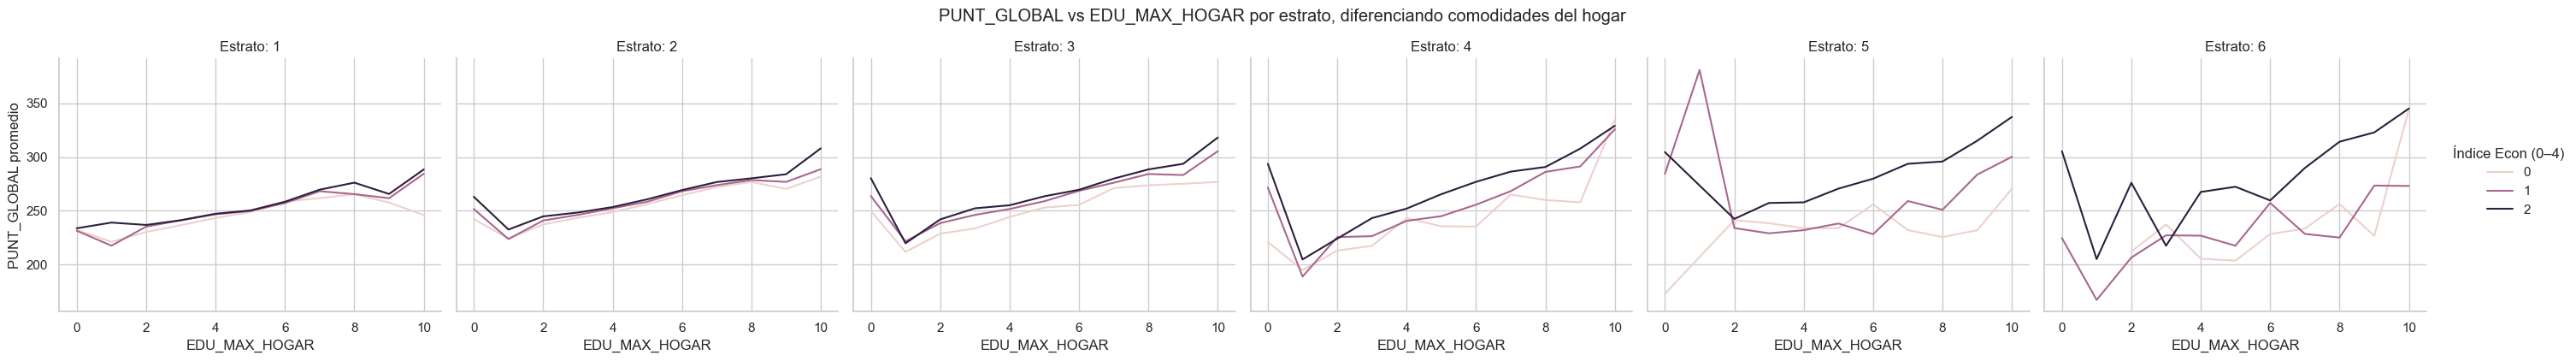

In [54]:
g = sns.FacetGrid(df, col="FAMI_ESTRATOVIVIENDA", height=4, aspect=1.2, sharey=True)
g.map_dataframe(
    sns.lineplot,
    x="EDU_MAX_HOGAR",
    y="PUNT_GLOBAL",
    hue="INDICE_ECON",
    estimator="mean",
    errorbar=None
)
g.add_legend(title="Índice Econ (0–4)")
g.set_axis_labels("EDU_MAX_HOGAR", "PUNT_GLOBAL promedio")
g.set_titles(col_template="Estrato: {col_name}")
plt.suptitle("PUNT_GLOBAL vs EDU_MAX_HOGAR por estrato, diferenciando comodidades del hogar", y=1.05)
plt.show()

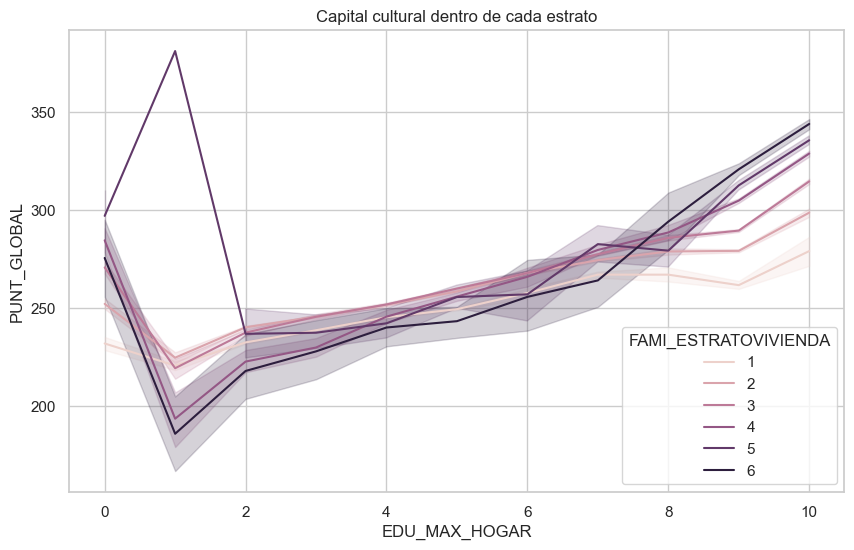

In [55]:
sns.lineplot(
    data=df,
    x="EDU_MAX_HOGAR",
    y="PUNT_GLOBAL",
    hue="FAMI_ESTRATOVIVIENDA",
    estimator="mean"
)

plt.title("Capital cultural dentro de cada estrato")
plt.show()

In [56]:
x|

# Promedios
prom_cultura = df.groupby("EDU_GRUPO")["PUNT_GLOBAL"].mean().reset_index()
prom_estrato = df.groupby("FAMI_ESTRATOVIVIENDA")["PUNT_GLOBAL"].mean().reset_index()
prom_indice = df.groupby("INDICE_ECON")["PUNT_GLOBAL"].mean().reset_index()

plt.figure(figsize=(9,6))

sns.lineplot(data=prom_cultura, x="EDU_GRUPO", y="PUNT_GLOBAL", marker="o", label="Capital cultural")
sns.lineplot(data=prom_estrato, x="FAMI_ESTRATOVIVIENDA", y="PUNT_GLOBAL", marker="o", label="Estrato")
sns.lineplot(data=prom_indice, x="INDICE_ECON", y="PUNT_GLOBAL", marker="o", label="Índice económico")

plt.title("Comparación directa de gradientes")
plt.ylabel("Puntaje promedio")
plt.show()

SyntaxError: invalid syntax (176869700.py, line 1)

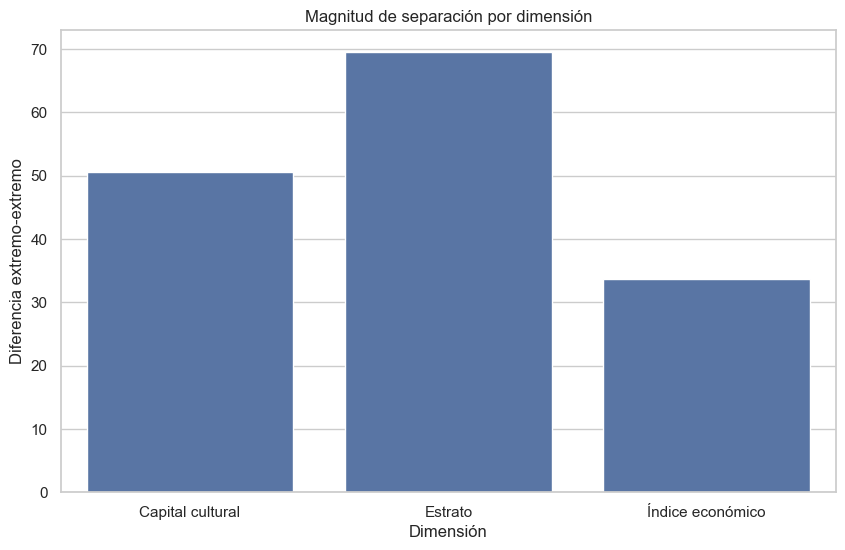

In [ ]:
rango_cultura = df.groupby("EDU_GRUPO")["PUNT_GLOBAL"].mean()
rango_estrato = df.groupby("FAMI_ESTRATOVIVIENDA")["PUNT_GLOBAL"].mean()
rango_indice = df.groupby("INDICE_ECON")["PUNT_GLOBAL"].mean()

rangos = pd.DataFrame({
    "Dimensión":["Capital cultural","Estrato","Índice económico"],
    "Diferencia extremo-extremo":[
        rango_cultura.max()-rango_cultura.min(),
        rango_estrato.max()-rango_estrato.min(),
        rango_indice.max()-rango_indice.min()
    ]
})

sns.barplot(data=rangos, x="Dimensión", y="Diferencia extremo-extremo")
plt.title("Magnitud de separación por dimensión")
plt.show()

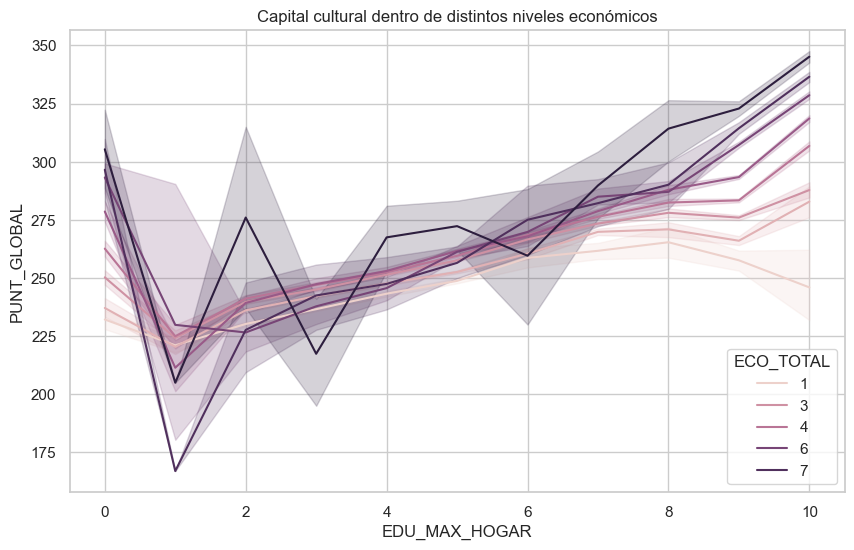

In [ ]:
df["ECO_TOTAL"] = df["FAMI_ESTRATOVIVIENDA"] + df["INDICE_ECON"]

sns.lineplot(
    data=df,
    x="EDU_MAX_HOGAR",
    y="PUNT_GLOBAL",
    hue="ECO_TOTAL",
    estimator="mean"
)

plt.title("Capital cultural dentro de distintos niveles económicos")
plt.show()

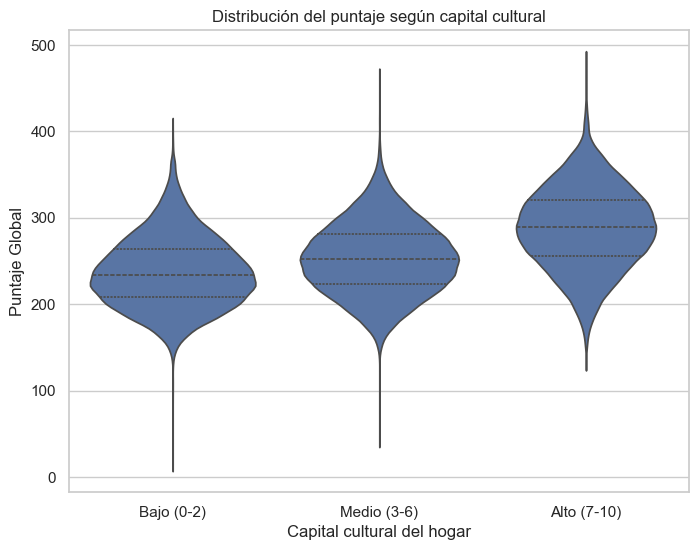

In [ ]:


plt.figure(figsize=(8,6))

sns.violinplot(
    data=df,
    x="EDU_GRUPO",
    y="PUNT_GLOBAL",
    inner="quartile"
)

plt.title("Distribución del puntaje según capital cultural")
plt.xlabel("Capital cultural del hogar")
plt.ylabel("Puntaje Global")
plt.show()

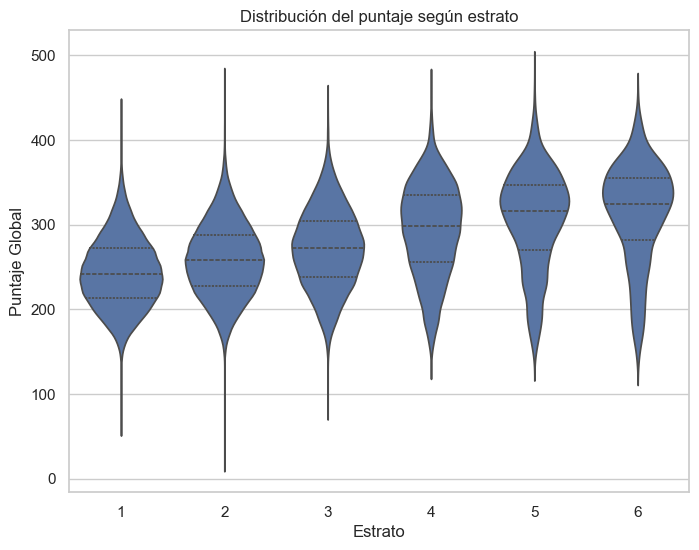

In [ ]:
plt.figure(figsize=(8,6))

sns.violinplot(
    data=df,
    x="FAMI_ESTRATOVIVIENDA",
    y="PUNT_GLOBAL",
    inner="quartile"
)

plt.title("Distribución del puntaje según estrato")
plt.xlabel("Estrato")
plt.ylabel("Puntaje Global")
plt.show()

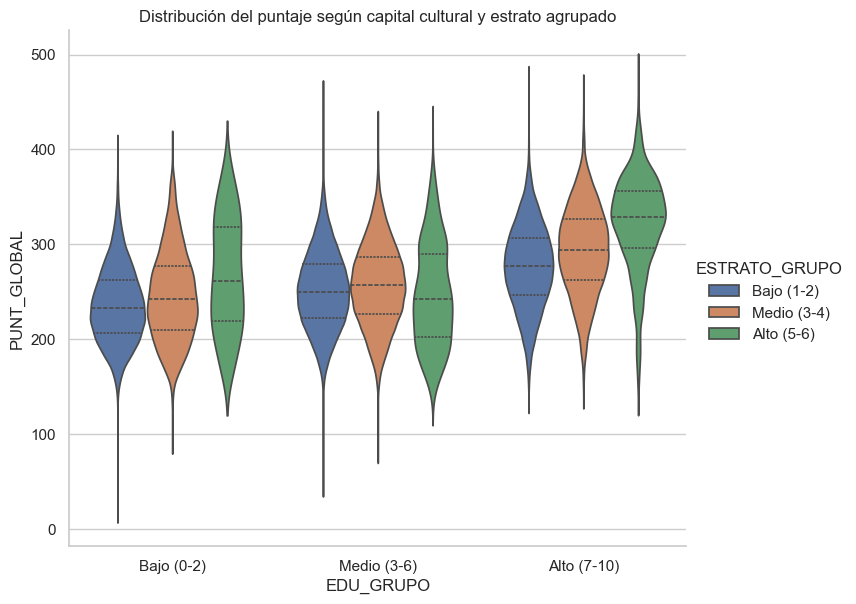

In [ ]:
# Agrupar estrato si no lo hiciste antes
df["ESTRATO_GRUPO"] = pd.cut(
    df["FAMI_ESTRATOVIVIENDA"],
    bins=[0,2,4,6],
    labels=["Bajo (1-2)", "Medio (3-4)", "Alto (5-6)"]
)

sns.catplot(
    data=df,
    x="EDU_GRUPO",
    y="PUNT_GLOBAL",
    hue="ESTRATO_GRUPO",
    kind="violin",
    height=6,
    aspect=1.2,
    split=False,
    inner="quartile"
)

plt.title("Distribución del puntaje según capital cultural y estrato agrupado")
plt.show()

El diagrama de violín muestra que el desplazamiento en la distribución del puntaje es más pronunciado entre niveles de capital cultural que entre niveles de estrato dentro de un mismo grupo cultural. Esto sugiere que la educación del hogar genera una diferenciación estructural más marcada en el desempeño académico que el estrato socioeconómico por sí solo.

In [ ]:
!pip install -q scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import sklearn
sklearn.__version__

'1.8.0'

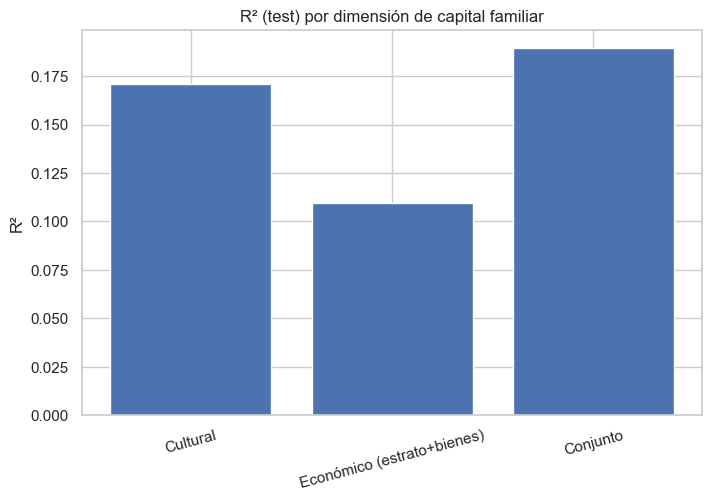

,Modelo,R2_test
0,Cultural,0.170815
1,Económico (estrato+bienes),0.109393
2,Conjunto,0.189365


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Datos (asegúrate de que estas columnas existen)
X_cul = df[["EDU_MAX_HOGAR"]]
X_eco = df[["FAMI_ESTRATOVIVIENDA", "INDICE_ECON"]]
X_all = df[["EDU_MAX_HOGAR", "FAMI_ESTRATOVIVIENDA", "INDICE_ECON"]]
y = df["PUNT_GLOBAL"]

# Split para que sea robusto (no “overfitting” visual)
Xc_tr, Xc_te, y_tr, y_te = train_test_split(X_cul, y, test_size=0.2, random_state=42)
Xe_tr, Xe_te, _, _ = train_test_split(X_eco, y, test_size=0.2, random_state=42)
Xa_tr, Xa_te, _, _ = train_test_split(X_all, y, test_size=0.2, random_state=42)

m_cul = LinearRegression().fit(Xc_tr, y_tr)
m_eco = LinearRegression().fit(Xe_tr, y_tr)
m_all = LinearRegression().fit(Xa_tr, y_tr)

r2_cul = r2_score(y_te, m_cul.predict(Xc_te))
r2_eco = r2_score(y_te, m_eco.predict(Xe_te))
r2_all = r2_score(y_te, m_all.predict(Xa_te))

res = pd.DataFrame({
    "Modelo": ["Cultural", "Económico (estrato+bienes)", "Conjunto"],
    "R2_test": [r2_cul, r2_eco, r2_all]
})

plt.figure(figsize=(8,5))
plt.bar(res["Modelo"], res["R2_test"])
plt.title("R² (test) por dimensión de capital familiar")
plt.ylabel("R²")
plt.xticks(rotation=15)
plt.show()

res

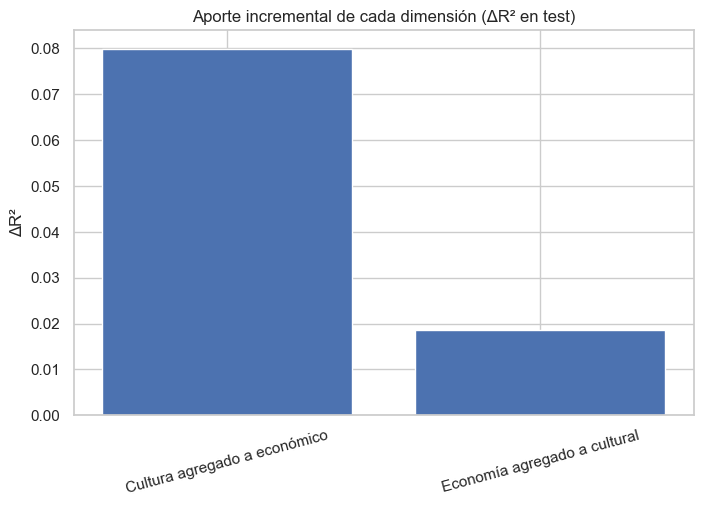

,Incremento,Delta_R2
0,Cultura agregado a económico,0.079971
1,Economía agregado a cultural,0.018550


In [ ]:
# Incrementos (usando los mismos splits)
r2_eco_only = r2_eco
r2_cul_only = r2_cul
r2_both = r2_all

inc_cul_over_eco = r2_both - r2_eco_only
inc_eco_over_cul = r2_both - r2_cul_only

inc = pd.DataFrame({
    "Incremento": ["Cultura agregado a económico", "Economía agregado a cultural"],
    "Delta_R2": [inc_cul_over_eco, inc_eco_over_cul]
})

plt.figure(figsize=(8,5))
plt.bar(inc["Incremento"], inc["Delta_R2"])
plt.title("Aporte incremental de cada dimensión (ΔR² en test)")
plt.ylabel("ΔR²")
plt.xticks(rotation=15)
plt.show()

inc

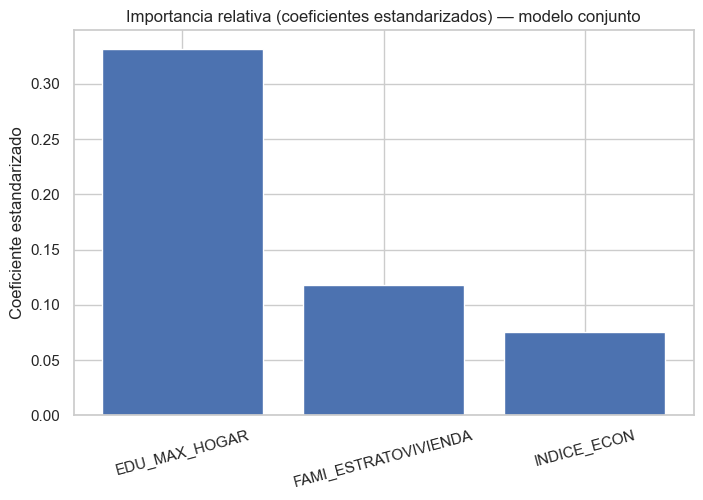

,Variable,Coef_estandarizado
0,EDU_MAX_HOGAR,0.331897
1,FAMI_ESTRATOVIVIENDA,0.117568
2,INDICE_ECON,0.075190


In [ ]:
from sklearn.preprocessing import StandardScaler

# Estandarizar
X = df[["EDU_MAX_HOGAR", "FAMI_ESTRATOVIVIENDA", "INDICE_ECON"]].copy()
y = df["PUNT_GLOBAL"].values.reshape(-1, 1)

scX = StandardScaler()
scY = StandardScaler()

Xz = scX.fit_transform(X)
yz = scY.fit_transform(y).ravel()

X_tr, X_te, y_tr, y_te = train_test_split(Xz, yz, test_size=0.2, random_state=42)

m = LinearRegression().fit(X_tr, y_tr)
coef = pd.DataFrame({
    "Variable": ["EDU_MAX_HOGAR", "FAMI_ESTRATOVIVIENDA", "INDICE_ECON"],
    "Coef_estandarizado": m.coef_
}).sort_values("Coef_estandarizado", ascending=False)

plt.figure(figsize=(8,5))
plt.bar(coef["Variable"], coef["Coef_estandarizado"])
plt.title("Importancia relativa (coeficientes estandarizados) — modelo conjunto")
plt.ylabel("Coeficiente estandarizado")
plt.xticks(rotation=15)
plt.show()

coef

En los modelos hay interacción pues 17 + 11 =! 28, es decir, una parte de Capital Cultural está explicado en capital económico y viceversa. 

In [ ]:
df[["EDU_MAX_HOGAR","FAMI_ESTRATOVIVIENDA","INDICE_ECON"]].corr()

,EDU_MAX_HOGAR,FAMI_ESTRATOVIVIENDA,INDICE_ECON
EDU_MAX_HOGAR,1.000000,0.461474,0.403239
FAMI_ESTRATOVIVIENDA,0.461474,1.000000,0.424036
INDICE_ECON,0.403239,0.424036,1.000000


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = df[["EDU_MAX_HOGAR","FAMI_ESTRATOVIVIENDA","INDICE_ECON"]]
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

vif_data

ModuleNotFoundError: No module named 'statsmodels'

Eso mide la proporción de la varianza residual (después de economía) que cultura logra explicar.

In [ ]:
R2_e = r2_eco
R2_c = r2_cul
R2_all = r2_all

R2_parcial_c = (R2_all - R2_e) / (1 - R2_e)
R2_parcial_e = (R2_all - R2_c) / (1 - R2_c)

print("R2 parcial cultura:", R2_parcial_c)
print("R2 parcial economía:", R2_parcial_e)

R2 parcial cultura: 0.08979423729425162
R2 parcial economía: 0.022371112023872885


El R² parcial permite evaluar la contribución independiente de cada dimensión una vez controlada la otra. Los resultados muestran que el capital cultural explica aproximadamente el 9% de la varianza residual del desempeño académico después de considerar la dimensión económica, mientras que el capital económico explica apenas un 2% adicional una vez controlado el capital cultural. Esto sugiere que la educación del hogar captura una dimensión estructural más directamente asociada al rendimiento académico que las condiciones materiales del hogar, al menos en términos de asociación estadística.

In [ ]:
from sklearn.linear_model import LinearRegression

reg_aux = LinearRegression().fit(
    df[["EDU_MAX_HOGAR"]],
    df["FAMI_ESTRATOVIVIENDA"]
)

reg_aux.score(df[["EDU_MAX_HOGAR"]], df["FAMI_ESTRATOVIVIENDA"])

0.2129585931534771

Se estimó un modelo auxiliar para evaluar el grado de asociación entre capital cultural y capital económico. Los resultados muestran que la educación máxima del hogar explica aproximadamente el 21% de la variación en el estrato socioeconómico. Esto indica un solapamiento estructural significativo entre ambas dimensiones. En consecuencia, parte del efecto atribuido al capital económico en el desempeño académico podría estar mediado por el capital cultural.